<a href="https://colab.research.google.com/github/Saicharan39/Machine-Learning/blob/main/soil_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install tensorflow
!pip install keras

In [5]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img_width,img_height=224,224
batch_size=32
epochs=10

In [7]:
path='/content/drive/MyDrive/Soil_Dataset'




In [8]:
train_data_dir='/content/drive/MyDrive/Soil_Dataset/Train'
test_data_dir='/content/drive/MyDrive/Soil_Dataset/Test'

In train data there are 4 subfolders

In [9]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 4


In [10]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')

The number of files in the directory is: 175


In [11]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 144


In [12]:

from glob import glob

glob('/content/drive/MyDrive/Soil_Dataset/Train/*')



['/content/drive/MyDrive/Soil_Dataset/Train/Black_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Red_Soil']

In [13]:
labels=['Alluvial_Soil','Black_Soil','Clay_Soil','Red_Soil']

In [14]:
def show_soil(path):
 im=cv2.imread(path)
 im_resized=cv2.resize(im,(img_height,img_width),interpolation=cv2.INTER_LINEAR)
 plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
 plt.show()

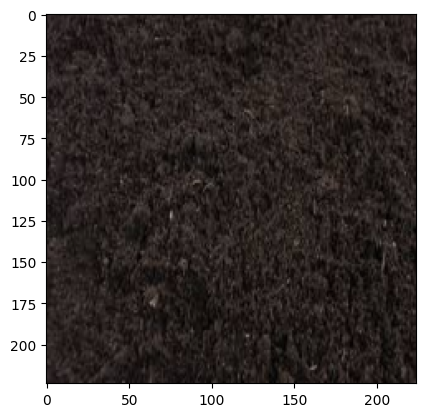

In [15]:
show_soil('/content/drive/MyDrive/Soil_Dataset/Test/Black_Soil/Black_5.jpg')

In [16]:
trainGen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
testGen=ImageDataGenerator(rescale=1./255)

In [17]:
train=trainGen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size,shuffle=True)
test=testGen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size)


Found 715 images belonging to 4 classes.
Found 188 images belonging to 4 classes.


f

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall

img_height = 224
img_width = 224

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=(img_height, img_width, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

# Compile the model with metrics
model.compile(loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if your labels are integers
              optimizer='adam',
              metrics=['accuracy', Precision(), Recall()])

model.summary()





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      73792     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 56, 56, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 32)       

In [19]:
epochs=10

In [22]:
model.fit(train,epochs=epochs,validation_data=test)


Epoch 1/10
23/23 [==============================] - 271s 11s/step - loss: 1.0103 - accuracy: 0.5189 - precision_1: 0.6504 - recall_1: 0.3538 - val_loss: 0.7704 - val_accuracy: 0.6011 - val_precision_1: 0.9213 - val_recall_1: 0.4362
Epoch 2/10
23/23 [==============================] - 255s 11s/step - loss: 0.6321 - accuracy: 0.7203 - precision_1: 0.7929 - recall_1: 0.6210 - val_loss: 0.4965 - val_accuracy: 0.8032 - val_precision_1: 0.8412 - val_recall_1: 0.7606
Epoch 3/10
23/23 [==============================] - 253s 11s/step - loss: 0.4671 - accuracy: 0.8126 - precision_1: 0.8348 - recall_1: 0.7846 - val_loss: 0.5056 - val_accuracy: 0.8191 - val_precision_1: 0.8198 - val_recall_1: 0.7500
Epoch 4/10
23/23 [==============================] - 256s 11s/step - loss: 0.3598 - accuracy: 0.8490 - precision_1: 0.8598 - recall_1: 0.8322 - val_loss: 0.3333 - val_accuracy: 0.9043 - val_precision_1: 0.9209 - val_recall_1: 0.8670
Epoch 5/10
23/23 [==============================] - 250s 11s/step - loss

In [23]:
model.history.history.keys()


dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

In [24]:
train_loss=model.history.history['loss']
train_loss

[1.010318636894226,
 0.6321375966072083,
 0.4670915901660919,
 0.3598010540008545,
 0.3351951837539673,
 0.2793596684932709,
 0.24111327528953552,
 0.19582515954971313,
 0.21599659323692322,
 0.19642944633960724]

In [25]:
train_acc=model.history.history['accuracy']
train_acc

[0.5188811421394348,
 0.7202796936035156,
 0.8125874400138855,
 0.8489510416984558,
 0.8797202706336975,
 0.8867132663726807,
 0.9160839319229126,
 0.9160839319229126,
 0.9174824953079224,
 0.9328671097755432]

In [26]:
test_loss=model.history.history['val_loss']
test_loss

[0.7703865766525269,
 0.4964781701564789,
 0.5056182146072388,
 0.3332754075527191,
 0.34664151072502136,
 0.3387714624404907,
 0.30620235204696655,
 0.3455146253108978,
 0.33949485421180725,
 0.3656153976917267]

In [27]:
test_acc=model.history.history['val_accuracy']
test_acc

[0.6010638475418091,
 0.8031914830207825,
 0.8191489577293396,
 0.9042553305625916,
 0.8723404407501221,
 0.8882978558540344,
 0.8989361524581909,
 0.8617021441459656,
 0.9095744490623474,
 0.8670212626457214]

In [29]:
train_precision=model.history.history['precision_1']
train_precision

[0.6503856182098389,
 0.7928571701049805,
 0.8348214030265808,
 0.8598265647888184,
 0.8969520926475525,
 0.8936170339584351,
 0.9215406775474548,
 0.9209039807319641,
 0.922096312046051,
 0.9339887499809265]

In [30]:
test_precision=model.history.history['val_precision_1']
test_precision

[0.9213483333587646,
 0.841176450252533,
 0.819767415523529,
 0.9209039807319641,
 0.8763440847396851,
 0.9213483333587646,
 0.906593382358551,
 0.8695651888847351,
 0.9277777671813965,
 0.8756756782531738]

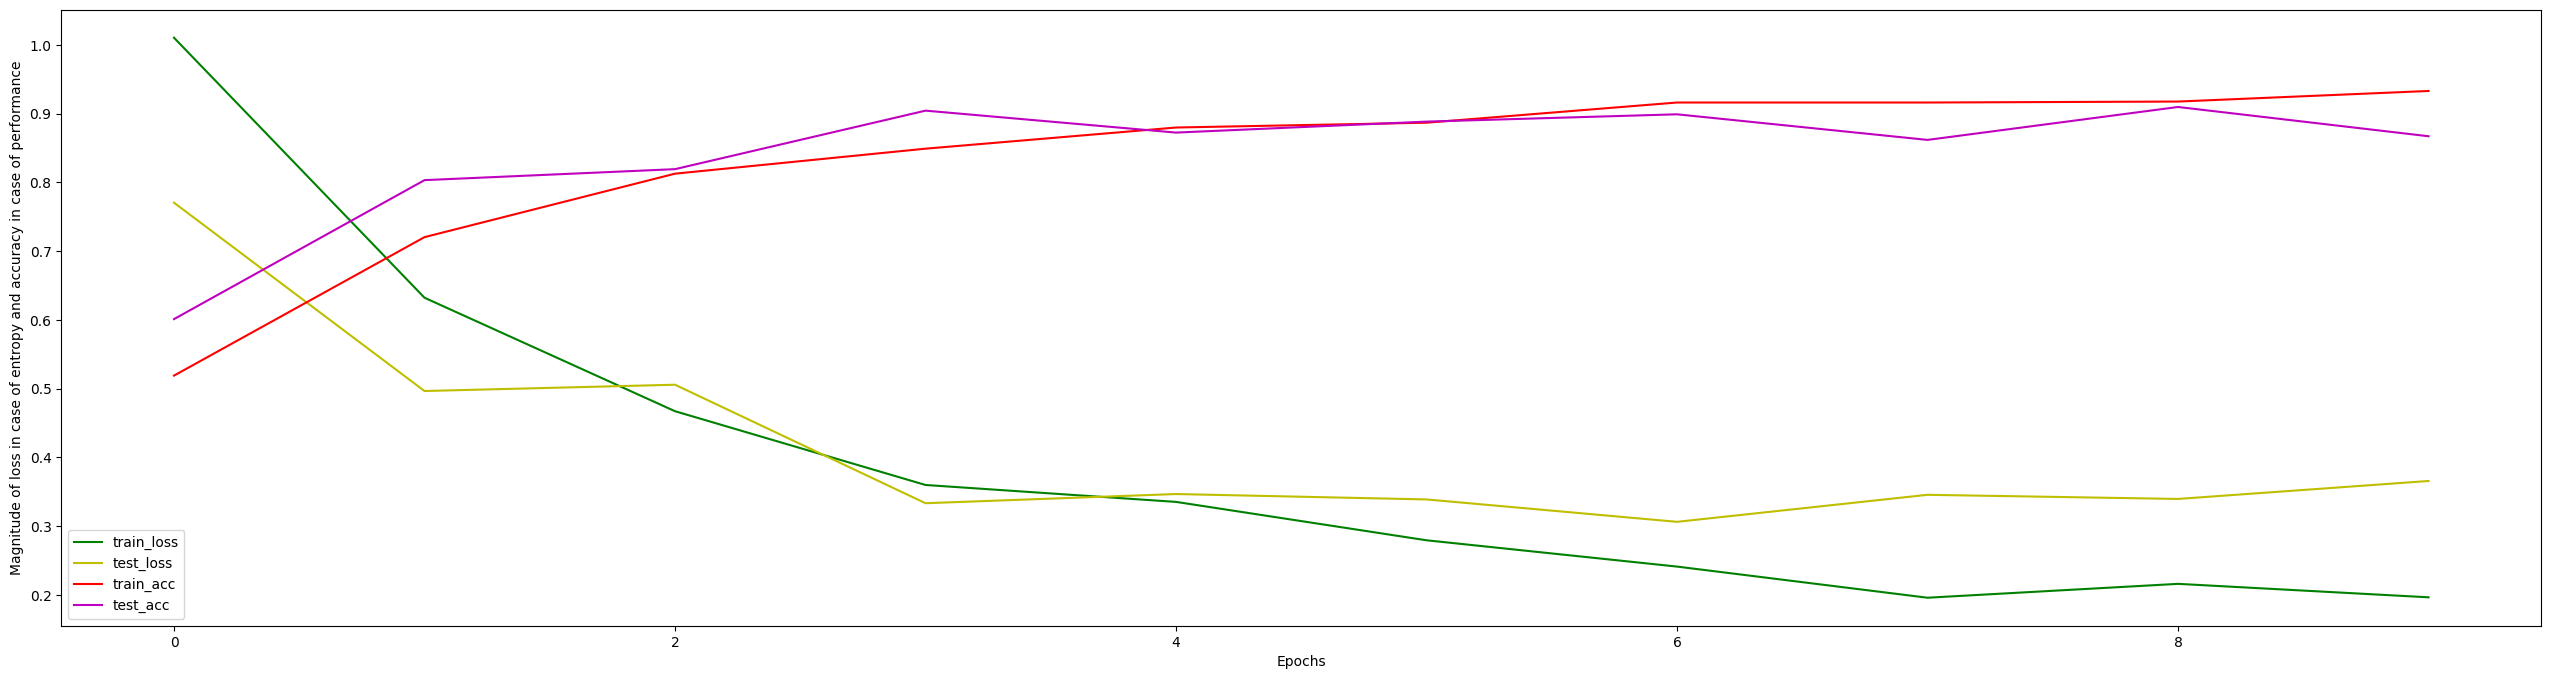

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming epochs is defined somewhere in your code
epochs = 10

# Assuming train_loss, test_loss, train_acc, and test_acc are defined somewhere in your code
# Ensure they have the same length as the number of epochs
train_loss = train_loss[:epochs]
test_loss = test_loss[:epochs]
train_acc = train_acc[:epochs]
test_acc = test_acc[:epochs]

plt.figure(figsize=(32, 8))
plt.plot(np.arange(epochs), train_loss, color='g', label='train_loss')
plt.plot(np.arange(epochs), test_loss, color='y', label='test_loss')
plt.plot(np.arange(epochs), train_acc, color='r', label='train_acc')
plt.plot(np.arange(epochs), test_acc, color='m', label='test_acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Magnitude of loss in case of entropy and accuracy in case of performance')

plt.show()



In [32]:
acc= model.evaluate(test)
print('Test acciracy:', acc)
#print('Test Acc:', acc)




6/6 [==============================] - 23s 2s/step - loss: 0.3656 - accuracy: 0.8670 - precision_1: 0.8757 - recall_1: 0.8617
Test acciracy: [0.3656154274940491, 0.8670212626457214, 0.8756756782531738, 0.8617021441459656]


Prediction System


1/1 [==============================] - 0s 167ms/step


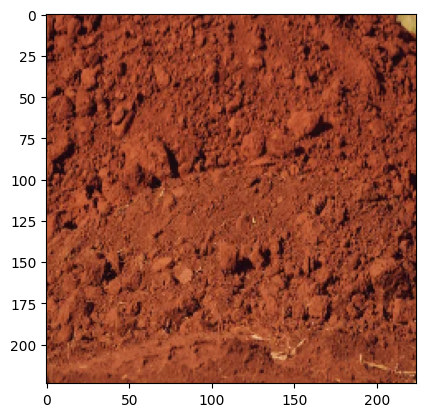

Predicted Class: Red_Soil
Probability: 1.0
Predicted Class: Red_Soil
Probability: 1.0000


In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def predict_soil_function(path, model, class_labels, img_height=224, img_width=224):
    # Load and preprocess the image
    img = image.load_img(path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_probability = predictions[0][predicted_class_index]

    # Display the image
    im_resized = cv2.resize(cv2.imread(path), (img_height, img_width), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

    # Print predicted class and its probability
    predicted_class = class_labels[predicted_class_index]
    print('Predicted Class:', predicted_class)
    print('Probability:', predicted_probability)

    return predicted_class, predicted_probability

# Assuming you already have the 'model' loaded and class labels defined
# model = ...
class_labels = ['Alluvial_Soil', 'Black_Soil', 'Clay_Soil', 'Red_Soil']

predict_soil_variable = '/content/reddy.jpg'
predicted_class, predicted_probability = predict_soil_function(predict_soil_variable, model, class_labels)

# Access the predicted class and probability
print(f'Predicted Class: {predicted_class}')
print(f'Probability: {predicted_probability:.4f}')

